This part of the project was supposed to perform hierarchical clustering using itw own distance matrix, which are actually distances for al the nodes in graph G. Distances are calculated using nx.shortest_path_length, but the code was running for couple of hourse, and even the Mat_distance was calculated properly - dendogram could not be drawn. 
Note: not finished

In [3]:
import json
import logging
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import scipy.stats as stats
from numpy import inf

def read_json(file):
      try:
        #print('Reading from input')
        with open(file, 'r') as f:
            return json.load(f)
      finally:
        print('Done reading')

d = read_json('/content/challenge_graph.json')
df_1 = pd.DataFrame(d['nodes'])
df_2 = pd.DataFrame(d['links'])

def read_json_file(filename):
    import networkx as nx 
    with open(filename) as f:
        js_graph = json.load(f)
        G = nx.Graph()
    return nx.node_link_graph(js_graph)

G = read_json_file('/content/challenge_graph.json')

Done reading


In [5]:
#print(d)
df_1.head()

,id,q1,q2
0,48633953191,266,0.496241
1,1438155667,2060,0.135922
2,37754729913,1696,0.034788
3,45694946584,6882,0.120314
4,8048097398,1031,0.000000


In [7]:
df_2.head()
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3756 entries, 0 to 3755
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      3756 non-null   object
 1   source  3756 non-null   object
 2   target  3756 non-null   object
dtypes: object(3)
memory usage: 88.2+ KB


In [10]:
#deal with missing values  // There is no missing values in our data
percent_missing =round(100*(df_1.isnull().sum())/len(df_1),2)
print(percent_missing)

percent_missing_2 =round(100*(df_2.isnull().sum())/len(df_2),2)
print(percent_missing_2)

id    0.0
q1    0.0
q2    0.0
dtype: float64
id        0.0
source    0.0
target    0.0
dtype: float64


In [13]:
cleaned_df_1 = df_1.drop(['q1', 'q2'], axis=1)
#cleaned_df_1.info()
#print(cleaned_df_1)
cleaned_df_1.head()

,id
0,48633953191
1,1438155667
2,37754729913
3,45694946584
4,8048097398


In [30]:
#instead of Euclidean distance for hierarchical clustering I will be using shortest distance between nodes, number of hops from one to another
#dist = nx.shortest_path(graph, 'A', 'B')

#dist_example = nx.shortest_path(G, df_1['id'][0], df_1['id'][1])
#if(dist_example):
#  print(dist_example)

try:
    dist_example = nx.shortest_path(G, df_1['id'][0], df_1['id'][55])
    dist_len = len(dist_example)
    print(dist_example)
    print(dist_len)
except:
    dist_example = inf
    print(dist_example)



['48633953191', '10446954062']
2


In [58]:
len_id = len(df_1['id'])
Mat_distance = np.zeros((len_id, len_id))
print(Mat_distance)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [40]:
def ReturnNodeFromIndex(df_1_in, index_in):
  return df_1_in['id'][index_in]

In [59]:
#print(nx.shortest_path_length(G, df_1['id'][0], df_1['id'][777]))

In [ ]:
# PREVISE KOMPLIKOVANO S OVOM MATRICOM!
for i in range(len_id):
  for j in range(len_id):
    try:
      dist_example = nx.shortest_path(G, df_1['id'][i], df_1['id'][j])
      dist_len = len(dist_example)
      Mat_distance[i][j] = dist_len
      print('i, j upisani', i, j)
    except:
      dist_len = inf
      Mat_distance[i][j] = dist_len
      print('i, j NISU upisani, upisano inf', i, j)

In [60]:
#print(nx.shortest_path_length(G, df_1['id'][0], df_1['id'][777]))

for i in range(len_id):
  for j in range(len_id):
    try:
      len_ij = nx.shortest_path_length(G, df_1['id'][i], df_1['id'][j])
      Mat_distance[i][j] = len_ij
      print('i, j upisani', i, j)
    except:
      len_ij = inf
      Mat_distance[i][j] = len_ij
      print('i, j NISU upisani, upisano inf', i, j)



Streaming output truncated to the last 5000 lines.
i, j upisani 3504 2012
i, j upisani 3504 2013
i, j upisani 3504 2014
i, j upisani 3504 2015
i, j upisani 3504 2016
i, j upisani 3504 2017
i, j upisani 3504 2018
i, j upisani 3504 2019
i, j upisani 3504 2020
i, j upisani 3504 2021
i, j upisani 3504 2022
i, j upisani 3504 2023
i, j upisani 3504 2024
i, j upisani 3504 2025
i, j upisani 3504 2026
i, j upisani 3504 2027
i, j upisani 3504 2028
i, j upisani 3504 2029
i, j upisani 3504 2030
i, j upisani 3504 2031
i, j upisani 3504 2032
i, j upisani 3504 2033
i, j upisani 3504 2034
i, j upisani 3504 2035
i, j upisani 3504 2036
i, j upisani 3504 2037
i, j upisani 3504 2038
i, j upisani 3504 2039
i, j upisani 3504 2040
i, j upisani 3504 2041
i, j upisani 3504 2042
i, j upisani 3504 2043
i, j upisani 3504 2044
i, j upisani 3504 2045
i, j upisani 3504 2046
i, j upisani 3504 2047
i, j upisani 3504 2048
i, j upisani 3504 2049
i, j upisani 3504 2050
i, j upisani 3504 2051
i, j upisani 3504 2052
i, j u

In [64]:
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram

In [62]:
print(Mat_distance)

[[ 0. inf inf ... inf inf inf]
 [inf  0.  3. ...  2.  2.  2.]
 [inf  3.  0. ...  4.  4.  4.]
 ...
 [inf  2.  4. ...  0.  2.  2.]
 [inf  2.  4. ...  2.  0.  2.]
 [inf  2.  4. ...  2.  2.  0.]]


In [77]:
for i in range(len(Mat_distance)):
  print(Mat_distance[i])

[   0. 5000. 5000. ... 5000. 5000. 5000.]
[5.e+03 0.e+00 3.e+00 ... 2.e+00 2.e+00 2.e+00]
[5.e+03 3.e+00 0.e+00 ... 4.e+00 4.e+00 4.e+00]
[5.e+03 2.e+00 3.e+00 ... 3.e+00 3.e+00 3.e+00]
[5.e+03 2.e+00 3.e+00 ... 3.e+00 3.e+00 3.e+00]
[5.e+03 3.e+00 3.e+00 ... 4.e+00 4.e+00 4.e+00]
[5.e+03 3.e+00 4.e+00 ... 4.e+00 4.e+00 4.e+00]
[5.e+03 2.e+00 3.e+00 ... 3.e+00 3.e+00 3.e+00]
[5.e+03 4.e+00 5.e+00 ... 6.e+00 6.e+00 6.e+00]
[5.e+03 3.e+00 5.e+00 ... 5.e+00 5.e+00 5.e+00]
[5.e+03 2.e+00 4.e+00 ... 4.e+00 4.e+00 4.e+00]
[5.e+03 3.e+00 4.e+00 ... 4.e+00 4.e+00 4.e+00]
[5.e+03 2.e+00 3.e+00 ... 3.e+00 3.e+00 3.e+00]
[5.e+03 3.e+00 4.e+00 ... 3.e+00 3.e+00 3.e+00]
[5.e+03 2.e+00 3.e+00 ... 3.e+00 3.e+00 3.e+00]
[5.e+03 2.e+00 2.e+00 ... 3.e+00 3.e+00 3.e+00]
[5.e+03 3.e+00 5.e+00 ... 5.e+00 5.e+00 5.e+00]
[5.e+03 4.e+00 5.e+00 ... 5.e+00 5.e+00 5.e+00]
[5.e+03 3.e+00 4.e+00 ... 4.e+00 4.e+00 4.e+00]
[5.e+03 1.e+00 3.e+00 ... 3.e+00 3.e+00 3.e+00]
[5.e+03 3.e+00 4.e+00 ... 3.e+00 3.e+00 3.e+00

In [63]:
condensed_dist = squareform(Mat_distance)


In [75]:
print(condensed_dist)

[inf inf inf ...  2.  2.  2.]


In [68]:
#need to fix inf values
Mat_distance_edit = Mat_distance

for i in range(len(Mat_distance_edit)):
  for j in range(len(Mat_distance_edit)):
    if (Mat_distance_edit[i][j] == inf):
      Mat_distance_edit[i][j] = 5000

In [69]:
condensed_dist_edit = squareform(Mat_distance_edit)

In [70]:
linkresult = linkage(condensed_dist_edit)

In [74]:
dendrogram(linkresult)                                #RecursionError: maximum recursion depth exceeded while getting the str of an object
plt.show()

RecursionError: ignored

In [76]:
import plotly.figure_factory as ff
import numpy as np

fig = ff.create_dendrogram(linkresult)
fig.update_layout(width=800, height=500)
fig.show()

#Dendogram could not be plotted!

#Could not load the JavaScript files needed to display output. 
#This is probably because your Google Account login access has expired or because third-party cookies are not allowed by your browser. 
#Please reload this page.

In [4]:
#spl = dict(nx.all_pairs_shortest_path_length(G))
spl = list(nx.all_pairs_shortest_path_length(G))

In [53]:
spl_list = list(spl)
#print(len(spl_list[0]))

for i in range(len(spl_list[3])):
    #print(spl_list[0][i])  
    broj = int(spl_list[0][i])
    index_2 = ReturnNodeFromIndex(df_1, broj) 
    print(index_2)   
           

8048097398
12762152189
18866083059
45694946584
45694946584
46105172901
246800250
45694946584
1438155667
46105172901
1438155667


In [25]:
sp = list(nx.all_pairs_shortest_path(G))

In [49]:
#print((sp[0][0]))         #nulti je povezan na 11 drugih cvorova


#print(len(sp[0][1]))

sp[0]

('48633953191',
 {'48633953191': ['48633953191'],
  '56010353': ['48633953191', '56010353'],
  '10446954062': ['48633953191', '10446954062'],
  '1461679662': ['48633953191', '1461679662'],
  '1782523938': ['48633953191', '1782523938'],
  '1695753418': ['48633953191', '1695753418'],
  '2935685012': ['48633953191', '2935685012'],
  '2846588': ['48633953191', '2846588'],
  '5353089060': ['48633953191', '5353089060'],
  '1815894041': ['48633953191', '1815894041'],
  '221222696': ['48633953191', '221222696'],
  '3918232748': ['48633953191', '3918232748'],
  '1440691802': ['48633953191', '1440691802'],
  '381018429': ['48633953191', '381018429'],
  '367843285': ['48633953191', '367843285'],
  '3047543213': ['48633953191', '3047543213'],
  '591543501': ['48633953191', '591543501'],
  '207966782': ['48633953191', '207966782'],
  '224940874': ['48633953191', '224940874'],
  '498482296': ['48633953191', '498482296'],
  '8035435930': ['48633953191', '8035435930'],
  '310864998': ['48633953191', '

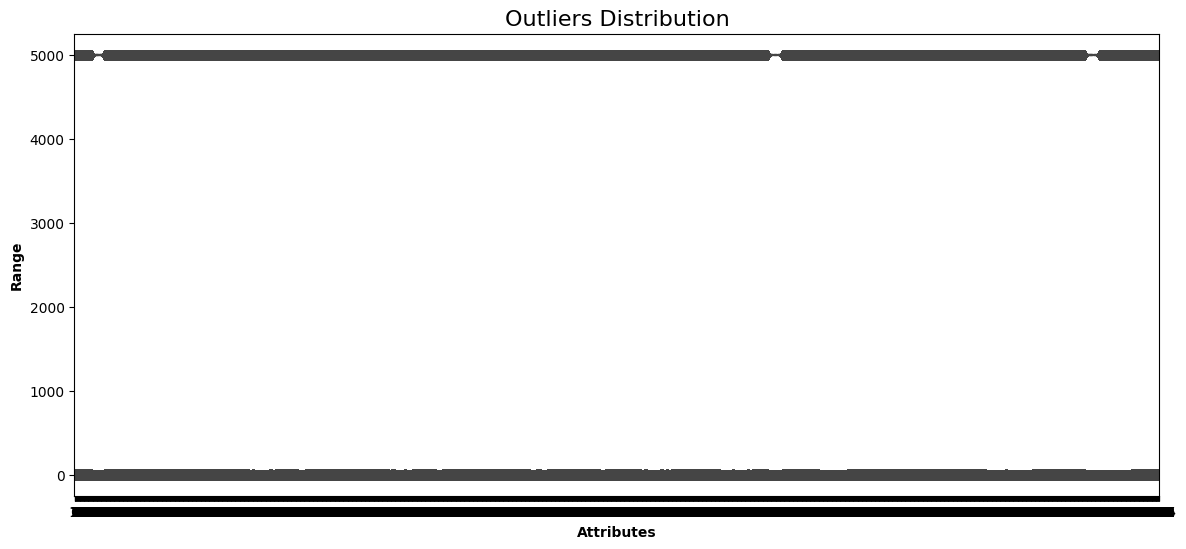

In [78]:
#import seaborn as sns
#def show_boxplot(df):
#  plt.rcParams['figure.figsize'] = [14,6]
#  sns.boxplot(data = df, orient="v")
#  plt.title("Outliers Distribution", fontsize = 16)
#  plt.ylabel("Range", fontweight = 'bold')
#  plt.xlabel("Attributes", fontweight = 'bold')
  #show_boxplot(cleaned_df_1)

#show_boxplot(Mat_distance)
   
